##### 모델링 : 함수 찾기
- 집의 평수를 알면 가격을 알수있을까?
- Y = aX + b
- 데이터를 잘 설명하는 직선 하나를 찾는것이 모델링
##### 손으로 숫자를 그린 이미지를 보고 숫자 7인지 1인지 맞출수 있을까?
- 아주복잡한 결정경계를 그린다. 경계를 그려주는 함수를 찾아내는 과정
##### ANN 인공신경망
- 단일층 : 신경망이 하나 퍼셉트론  1x1 -> 뉴런

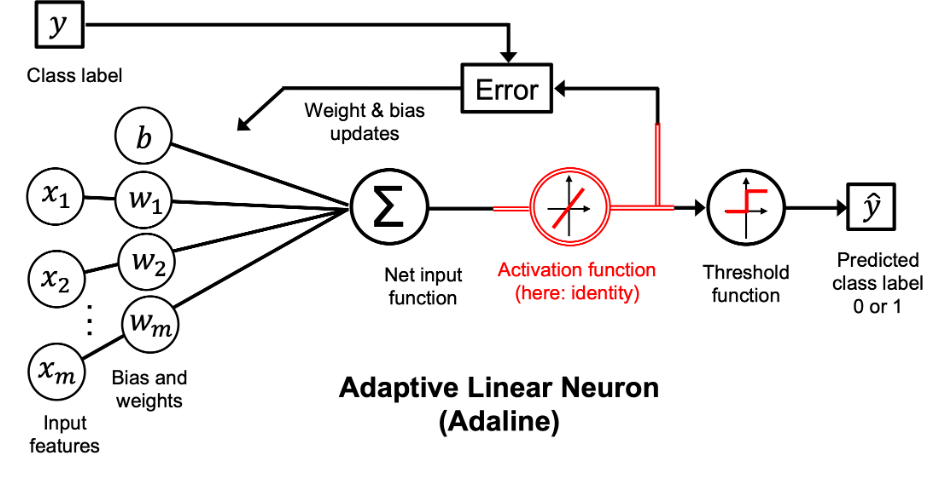


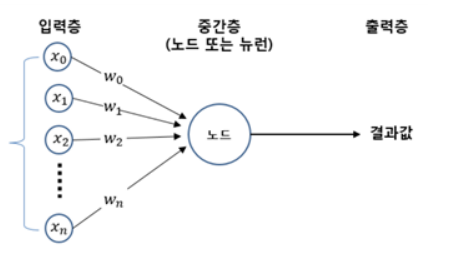

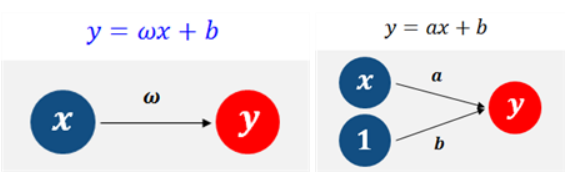

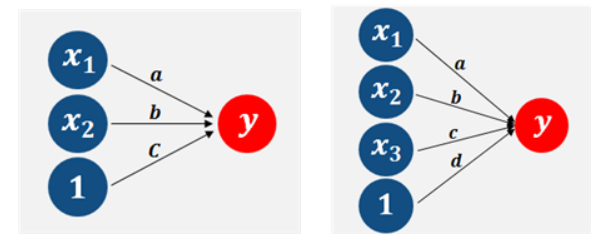

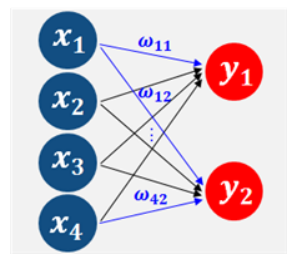
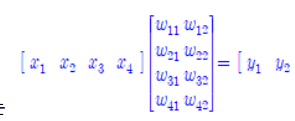

#### 활성화함수...
- 계단함수
- 시그모이드 : 연속적인 값을 출력 - 미분이 가능 - 오차 역전파
- 활성화 함수가 없다... f(z) = z
- y = (W100 x .... W1)X  --> 거대한 1층짜리 선형모델
- 초기 활성화 함수  스위치
    - 계단함수  if x > 0  1
    -             x <=   0

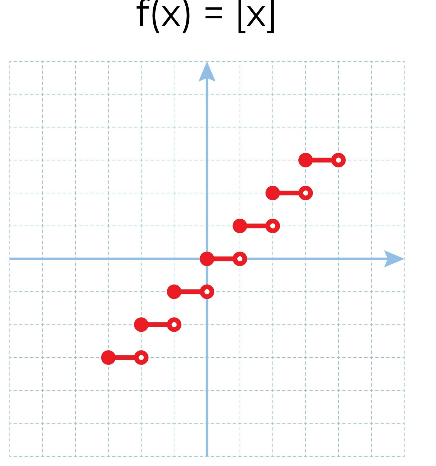    

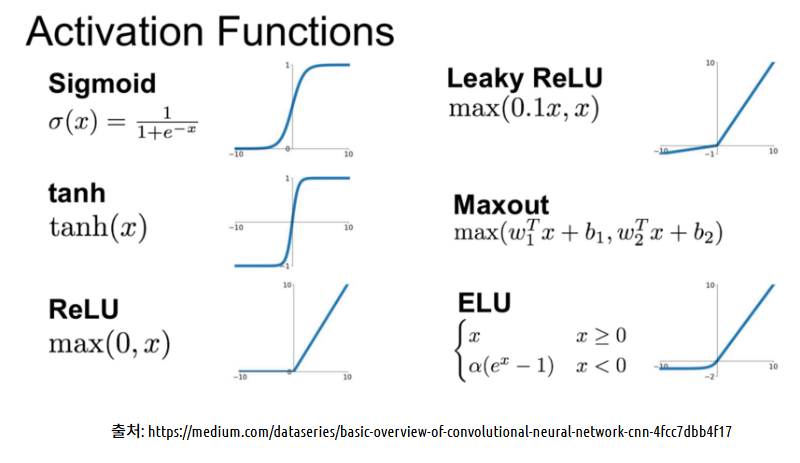

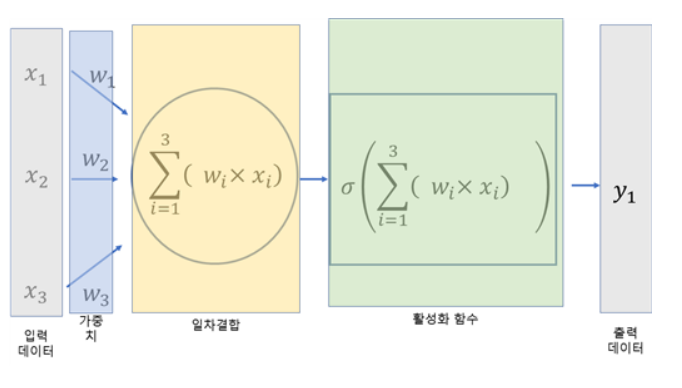

##### 다층신경망  MLP 퍼셉트론을 여러개 쌓아서 올린구조
 - input layer : 데이터가 들어오는곳(뉴런수 데이터의 특성 28x28 = 784)
 - hidden layer : 입력과 출력 사이에 있는 레이어

In [1]:
%conda install tensorflow

3 channel Terms of Service accepted
Channels:
 - defaults
Platform: win-64
Solving environment: done

## Package Plan ##

  environment location: c:\Users\playdata2\miniconda3\envs\deep

  added / updated specs:
    - tensorflow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    absl-py-2.1.0              |  py311haa95532_0         249 KB
    astunparse-1.6.3           |             py_0          17 KB
    c-ares-1.34.5              |       h731ff69_0         217 KB
    flatbuffers-24.3.25        |       h21716d4_0         1.6 MB
    gast-0.6.0                 |     pyhd3eb1b0_0          25 KB
    google-pasta-0.2.0         |     pyhd3eb1b0_0          46 KB
    grpcio-1.71.0              |  py311hbb1fe6b_0         1.0 MB
    h5py-3.14.0                |  py311h6fc9867_0         1.2 MB
    hdf5-1.14.5                |       ha36df97_2         2.1 MB
    keras-3.6.0                |  py311h

In [3]:
# MNIST 데이터셋 로드
from sklearn.datasets import fetch_openml
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# X,y = fetch_openml('mnist_784',version=1 ,return_X_y=True, parser='auto')


In [8]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [11]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
print(y_train[20])
plt.imshow(x_train[20],cmap='gray')  
print(x_train[20])

In [18]:
# 스케일링 표준화
x_train = x_train.astype('float32') / 255.0 
x_test = x_test.astype('float32') / 255.0

- 정답의 종류 클래스
#### 소프트맥스  전체클래스중에서 하나 선택   전체 10개중에서 정답이 1개일경우
- 확률 전체 클래스에 대해서 0~1  다 합치면 1되는 구조 0.2 0.6 0.2
#### 시그모이드 다중클래스  전체 10개중에서 정답이 여러개일때
- 각 클래스에 대해서 확률을 0~1 사이로 변환  0.8 0.9 0.1 


In [ ]:
model = tf.keras.Sequential([
    # 입력층  28 x 28 2D -->784 1D
    tf.keras.layers.Flatten(input_shape=(28,28)),
    # 은닉층 
    tf.keras.layers.Dense(128,activation = 'relu'),
    # 은닉층 
    tf.keras.layers.Dense(64,activation = 'relu'),
    # 은닉층 
    tf.keras.layers.Dense(32,activation = 'relu'),
    # 출력층
    tf.keras.layers.Dense(10,activation = 'softmax')    
])
model.summary()

c:\Users\playdata2\miniconda3\envs\deep\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model.compile(
    optimizer = 'adam', # 빠르고 안정적인
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [46]:
history = model.fit(
    x_train,
    y_train,
    epochs = 20,
    validation_data = (x_test, y_test),
    verbose = 1  # 로그 출력
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8794 - loss: 0.4267 - val_accuracy: 0.9515 - val_loss: 0.1552
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9629 - loss: 0.1257 - val_accuracy: 0.9712 - val_loss: 0.0987
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9764 - loss: 0.0786 - val_accuracy: 0.9744 - val_loss: 0.0830
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9825 - loss: 0.0590 - val_accuracy: 0.9751 - val_loss: 0.0797
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9866 - loss: 0.0441 - val_accuracy: 0.9763 - val_loss: 0.0793
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9894 - loss: 0.0358 - val_accuracy: 0.9783 - val_loss: 0.0711
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9918 - loss: 0.0272 - val_accuracy: 0.9758 - val_loss: 0.0811
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9935 - loss: 0.0214 - 

In [47]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

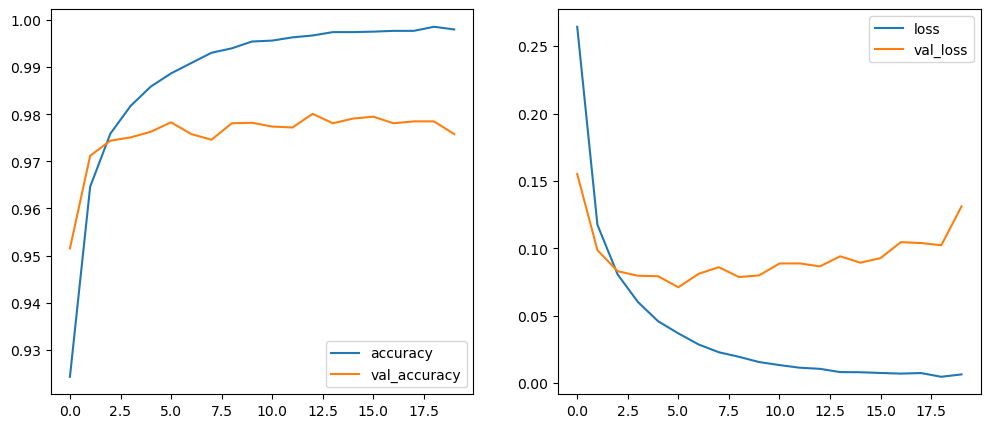

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label = 'loss')
plt.plot(history.history['val_loss'],label = 'val_loss')
plt.legend()

plt.show()

In [59]:
pred = model.predict(x_test)
np.argmax(pred[0]), y_test[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


(np.int64(7), np.uint8(7))

In [57]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.1590


[0.131138414144516, 0.9757999777793884]

In [64]:
np.argmax(pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, np.argmax(pred, axis=1)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.94      0.99      0.96      1010
           4       0.99      0.96      0.97       982
           5       0.98      0.95      0.96       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

